In [1]:
import os

root_dir = '/data/speech/digital_human/preprocessed/'

def get_files(dir):
    data = []
    files = sorted([os.path.join(dir, file) for file in os.listdir(dir)])
    for file in files:
        if file.endswith('.npy') and 'ARKit' in file:
            data.append(file)
        if os.path.isdir(file):
            data.extend(get_files(os.path.join(dir, file)))
    return data

files = get_files(root_dir)
print(len(files))

76


In [29]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

X = np.load(files[0], allow_pickle=True).item()['blendshapes']

errors = []
X_recons = []
dims = []
for n_components in tqdm(range(3, 15)):
    dims.append(n_components)
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(X)
    reconstructed_data = pca.inverse_transform(reduced_data)
    X_recons.append(reconstructed_data)
    error = mean_squared_error(X, reconstructed_data)
    errors.append(error)
    
    

100%|███████████████████████████████████████████| 12/12 [00:00<00:00, 21.08it/s]


In [34]:
def diff(x):
    return x[:-1] - x[1:]

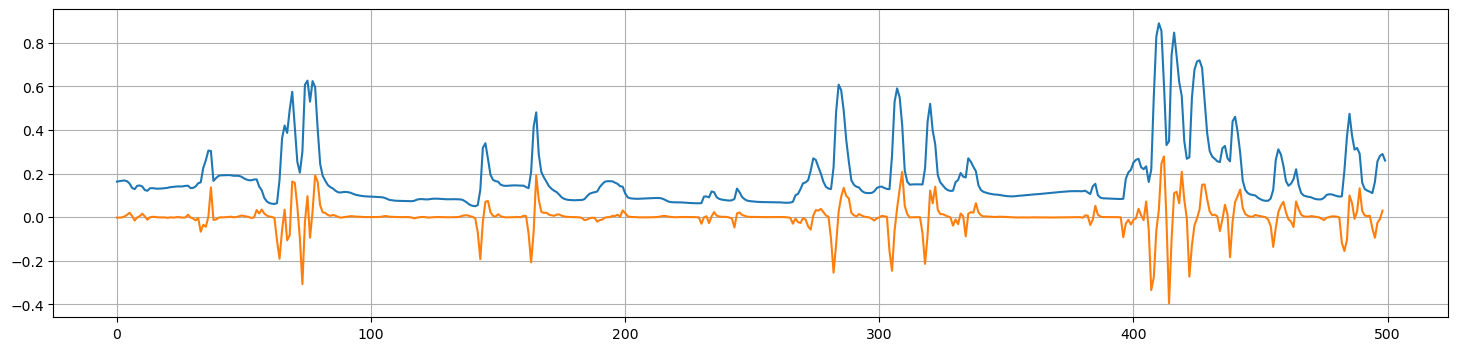

In [38]:
plt.figure(figsize=[18, 4])
plt.plot(X[:500, 20])
plt.plot(diff(X[:500, 20]))
plt.grid()
plt.show()